<a href="https://colab.research.google.com/github/Musungu-Maureen/WEEK-8-IP-CORE/blob/main/Maureen_Musungu_Week_8_IP_Core.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroidism Test

## Defining the Question

### a) Specifying the Data Analytic Question



The main aim of this study is to build a model that determines whether or not a patient's symptoms indicate that the patient has hypothyroid. 


### b) Defining the Metric for Success

This study will be considered successful when we are able to:


*   Identify which features are most impactful in influencing our prediction of a patient's hypothyroidism
*   Create an appropriate model which has a high accuracy level for the prediction. 





### c) Understanding the Context

This is a study conducted by a Data Scientist for Nairobi Hospital which previously conducted a clinical camp to test for hypothyroidism. The data collected focused on Thyroid patients. 
Nairobi Hospital is interested in having a model that predicts whether a patient has hypothyroidism or not by studying their symptoms.  

### d) Experimental Design Taken



1. Data Cleaning

2. EDA-Univariate, Bivariate and Multivariate Analysis

3. Modelling

4. Decision Trees: (Random Forests , Ada Boosted Trees , Gradient Boosted Trees)

5. Support (Vector Machines: Kernel = polynomial , linear , rbf)

6. Conclusion



### e) Data Relevance

The data availed is sufficient for our study as it contains all the columns required. 

## Reading the Data

In [414]:
# Importing all the libraries required

import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import mean_squared_error,r2_score,accuracy_score,f1_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [376]:
# Loading the dataset
data = pd.read_csv('/content/hypothyroid.csv')


In [377]:
#  previewing the top of our data
data.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [378]:
# previewing the bottom 

data.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,f,f,f,f,y,5.80,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,f,f,f,f,y,0.80,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


## Checking the Data

In [379]:
# checking the shape
data.shape

# The data has 3163 rows and 26 columns. 

(3163, 26)

In [380]:
# Checking the datatypes
data.dtypes

# All the columns are in the 'object' data type

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

In [381]:
# Checking all the columns in the dataset
data.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

## Tidying the Dataset

**Null Values**

In [382]:
# Checking for null values

data.isnull().sum()

# There are no null values in this dataset since the missing values have been represented with the 
# character '?'. 

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [383]:
# Making the null values visible 
data = data.replace(['?'], np.nan)
data.isnull().sum()

# We now have missing values

status                          0
age                           446
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           468
T3_measured                     0
T3                            695
TT4_measured                    0
TT4                           249
T4U_measured                    0
T4U                           248
FTI_measured                    0
FTI                           247
TBG_measured                    0
TBG                          2903
dtype: int64

* We shall replace these values once we have changed their datatypes. 

**Duplicates**

In [384]:
# Checking for duplicates

data.duplicated().sum()

77

In [385]:
# Dropping the 77 duplicated entries
data2 = data.drop_duplicates()
data2.duplicated().sum()

0

**Checking for Anomalies**

In [386]:
# Check the unique values in each column
# Using a for loop to iterate through the dataframe, 
# find the unique values in each column then print them out 


for column in data2.columns:           
  print(column)                        
  print(data2[column].unique())        
  print(data2[column].nunique())       
  print('\n............................')      

status
['hypothyroid' 'negative']
2

............................
age
['72' '15' '24' '77' '85' '64' '20' '42' '69' '75' '53' '59' '68' '50'
 '78' '65' '28' '43' '40' '84' nan '83' '63' '73' '36' '27' '48' '71' '60'
 '34' '79' '62' '74' '32' '41' '70' '29' '5' '58' '35' '51' '22' '16' '44'
 '39' '47' '18' '17' '88' '56' '30' '45' '66' '52' '54' '80' '33' '38'
 '92' '67' '46' '13' '89' '61' '49' '26' '57' '31' '90' '81' '25' '37'
 '76' '87' '23' '55' '86' '98' '21' '97' '1' '6' '14' '82' '11' '19' '9'
 '12' '10' '8' '7' '4' '93']
92

............................
sex
['M' 'F' nan]
2

............................
on_thyroxine
['f' 't']
2

............................
query_on_thyroxine
['f' 't']
2

............................
on_antithyroid_medication
['f' 't']
2

............................
thyroid_surgery
['f' 't']
2

............................
query_hypothyroid
['f' 't']
2

............................
query_hyperthyroid
['f' 't']
2

............................
pregnant
['f' 't']


* We can deduce that 

Numerical columns = [ ' age ' , ' TSH ' , ' T3 ' , ' TT4 ' , ' T4U ' , ' FTI ' , ' TBG ' ]

Categorical columns = [ ' sex ' , ' on_thyroxine ' ,' query_on_thyroxine ' ,' on_antithyroid_medication ' , ' thyroid_surgery ' , ' query_hypothyroid ' , ' query_hyperthyroid ' , ' pregnant ' , 'sick ' , ' tumor ', ' lithium ' , ' goitre ' , ' TSH_measured ', ' T3_measured ' , ' TT4_measured ' , ' T4U_measured ' , ' FTI_measured' , ' TBG_measured ' ]

In [387]:
# We therefore change the column datatypes accordingly

categorical_columns = ['sex', 'on_thyroxine','query_on_thyroxine','on_antithyroid_medication',
                       'thyroid_surgery','query_hypothyroid','query_hyperthyroid', 'pregnant',
                       'sick','tumor', 'lithium', 'goitre', 'TSH_measured', 'T3_measured', 
                       'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']

numerical_columns = ['age','TSH','T3', 'TT4', 'T4U', 'FTI' , 'TBG']


# Using a conditional for loop to convert each columns into the right data types

for column in data2.columns:
  if column in numerical_columns:
    data2[column]= pd.to_numeric(data2[column])
  
  else:
    data2[column] = data2[column].astype('category')
    
    
# checking the data types to confirm changes

data2.dtypes

status                       category
age                           float64
sex                          category
on_thyroxine                 category
query_on_thyroxine           category
on_antithyroid_medication    category
thyroid_surgery              category
query_hypothyroid            category
query_hyperthyroid           category
pregnant                     category
sick                         category
tumor                        category
lithium                      category
goitre                       category
TSH_measured                 category
TSH                           float64
T3_measured                  category
T3                            float64
TT4_measured                 category
TT4                           float64
T4U_measured                 category
T4U                           float64
FTI_measured                 category
FTI                           float64
TBG_measured                 category
TBG                           float64
dtype: objec

**Replacing Null Values**

In [391]:
# Filling the null values in the age column with the mean age
data2['age'].fillna((data2['age'].mean()))


0       72.0
1       15.0
2       24.0
3       24.0
4       77.0
        ... 
3158    58.0
3159    29.0
3160    77.0
3161    74.0
3162    56.0
Name: age, Length: 3086, dtype: float64

In [392]:
print(data2['age'].isnull().sum())
print(data2.isnull().sum())

438
status                          0
age                           438
sex                            73
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
thyroid_surgery                 0
query_hypothyroid               0
query_hyperthyroid              0
pregnant                        0
sick                            0
tumor                           0
lithium                         0
goitre                          0
TSH_measured                    0
TSH                           455
T3_measured                     0
T3                            680
TT4_measured                    0
TT4                           240
T4U_measured                    0
T4U                           239
FTI_measured                    0
FTI                           238
TBG_measured                    0
TBG                          2835
dtype: int64


In [393]:
cols = ['TSH','T3', 'TT4', 'T4U','FTI','TBG']
data3[cols] = data2[cols].fillna(0)

data3.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

In [394]:
data3 = data3.fillna(method='ffill')
data3.isnull().sum()

status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
TBG                          0
dtype: int64

**Dropping Columns**

In [395]:
# Checking the 'TBG_measured' column
data3['TBG_measured'].value_counts()

# Many of the entries did not have a measurement for this particular attribute.
# We can therefore drop this column and its correspondent, 'TBG' since many of the values will be 0s. 

n    2835
y     251
Name: TBG_measured, dtype: int64

In [396]:
final_df = data3.drop(['TBG','TBG_measured'], axis =1)
final_df

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI
0,hypothyroid,72.0,M,f,f,f,f,f,f,f,f,f,f,f,y,30.0,y,0.6,y,15.0,y,1.48,y,10.0
1,hypothyroid,15.0,F,t,f,f,f,f,f,f,f,f,f,f,y,145.0,y,1.7,y,19.0,y,1.13,y,17.0
2,hypothyroid,24.0,M,f,f,f,f,f,f,f,f,f,f,f,y,0.0,y,0.2,y,4.0,y,1.00,y,0.0
3,hypothyroid,24.0,F,f,f,f,f,f,f,f,f,f,f,f,y,430.0,y,0.4,y,6.0,y,1.04,y,6.0
4,hypothyroid,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,7.3,y,1.2,y,57.0,y,1.28,y,44.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,negative,58.0,F,f,f,f,f,f,f,f,f,f,f,f,y,5.8,y,1.7,y,86.0,y,0.91,y,95.0
3159,negative,29.0,F,f,f,f,f,f,f,f,f,f,f,f,y,0.8,y,1.8,y,99.0,y,1.01,y,98.0
3160,negative,77.0,M,f,f,f,f,f,f,f,f,f,f,f,y,1.2,y,0.6,y,71.0,y,0.68,y,104.0
3161,negative,74.0,F,f,f,f,f,f,f,f,f,f,f,f,y,1.3,y,0.1,y,65.0,y,0.48,y,137.0


## Exploratory Data Analysis

### **Univariate Analysis**

In [397]:
# Printing the statistical summaries of the data

final_df.describe()

,age,TSH,T3,TT4,T4U,FTI
count,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000,3086.000000
mean,51.112538,4.952793,1.507583,100.252722,0.901850,106.582275
std,17.854431,22.276447,1.179190,51.795700,0.339608,65.484772
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,38.000000,0.000000,0.500000,77.000000,0.820000,85.000000
50%,51.112538,0.400000,1.600000,100.000000,0.940000,105.000000
75%,64.000000,1.700000,2.200000,124.000000,1.050000,126.000000
max,98.000000,530.000000,10.200000,450.000000,2.210000,881.000000


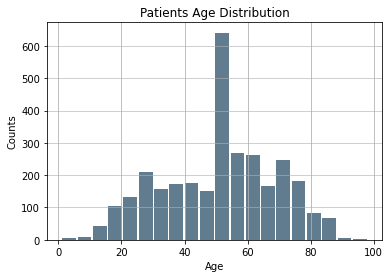

In [324]:
# Age Distribution
size, scale = 1000, 10

final_df['age'].plot.hist(grid=True, bins=20, rwidth=0.9,
                   color='#607c8e')
plt.title('Patients Age Distribution')
plt.xlabel('Age')
plt.ylabel('Counts')
plt.grid(axis='y', alpha=0.75)

* The data is fairly normal with a positive skew. 

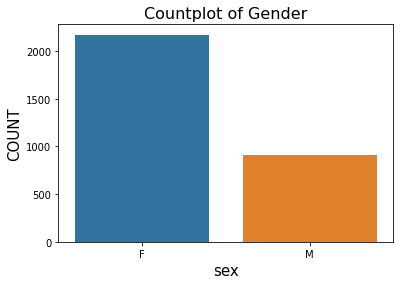

In [325]:
#visualizing the distribution of gender in the dataset

sb.countplot('sex',data = final_df)
plt.xlabel("sex",fontsize=15)
plt.ylabel("COUNT",fontsize=15)
plt.title("Countplot of Gender",fontsize=16)
plt.show()


* There are more females than males in our data.

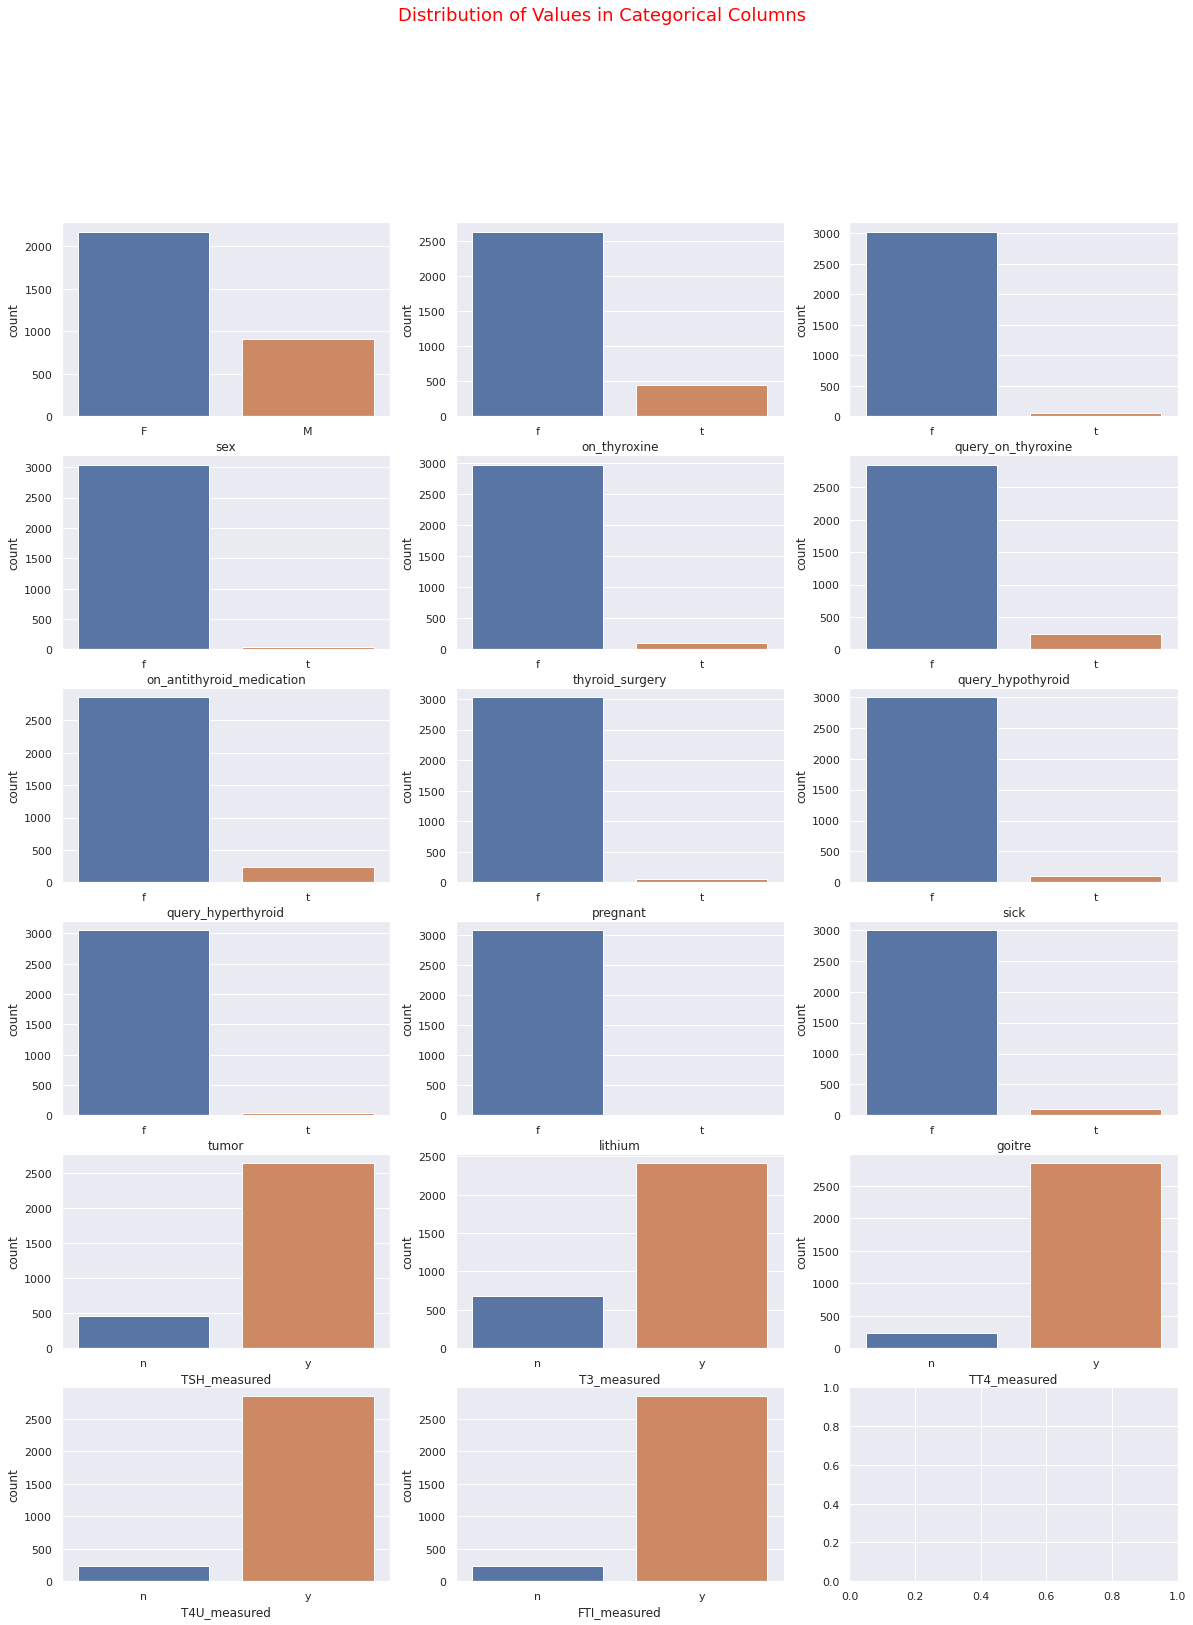

In [326]:
# Countplot of categorical columns in the dataset
# creating a list of the categorical columns in the dataset

categorical_columns_1 =[ 'sex', 'on_thyroxine', 'query_on_thyroxine',
      'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
      'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
      'TSH_measured', 'T3_measured', 'TT4_measured',
      'T4U_measured', 'FTI_measured']


sb.set(style = 'darkgrid', context = 'notebook')
corr = final_df.corr()
fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20,25))
plt.suptitle('Distribution of Values in Categorical Columns', fontsize = 18, y = 1, color = 'red')
for ax, data, column in zip(axes.flatten(), final_df, categorical_columns_1):
   sb.countplot(final_df[column], ax=ax)

### `**Bivariate Analysis**


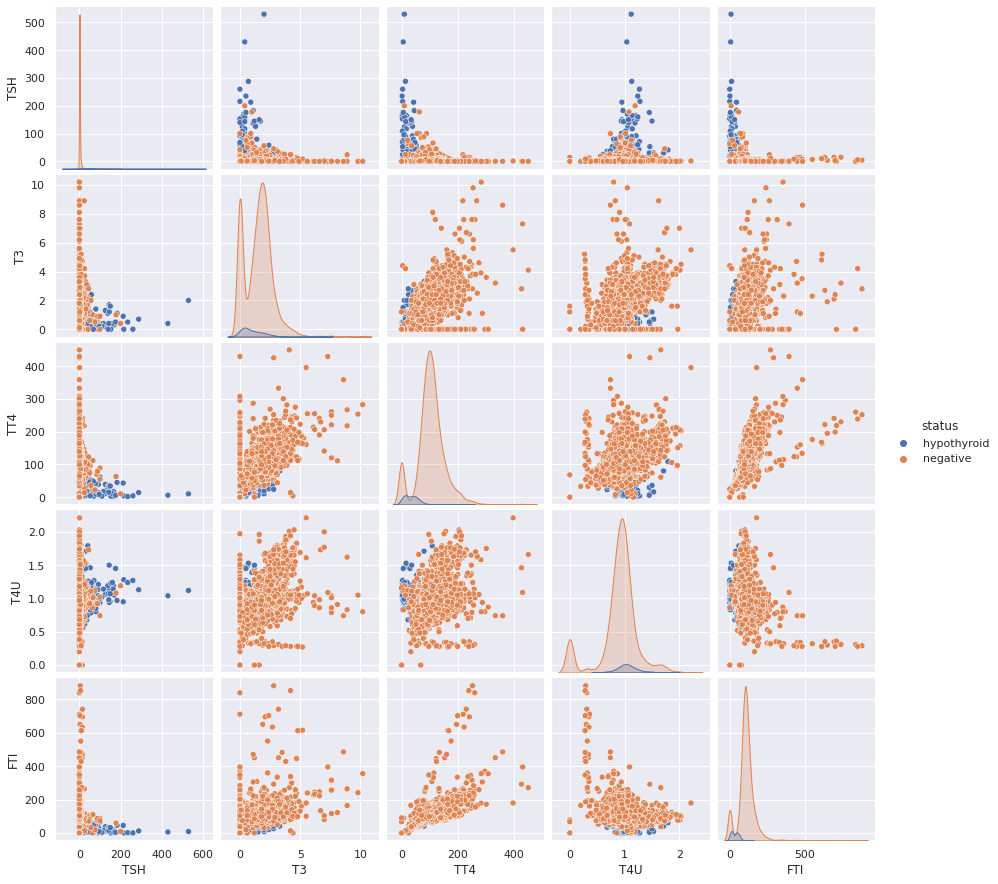

In [327]:
## Pairplot to show the status of hyprethyroidism on a patient based on the tested symptoms
## Shows either positive or negative
test_columns = ['TSH','T3','TT4','T4U','FTI']

sb.pairplot(final_df, kind="scatter", diag_kind="kde", vars=test_columns, hue="status")
plt.show()

In [328]:
# Checking for Multi collinearity

corr = final_df.corr()
corr

,age,TSH,T3,TT4,T4U,FTI
age,1.000000,0.011432,-0.074585,-0.000092,-0.024769,0.074495
TSH,0.011432,1.000000,-0.083445,-0.219696,0.096258,-0.183648
T3,-0.074585,-0.083445,1.000000,0.493887,0.455964,0.326356
TT4,-0.000092,-0.219696,0.493887,1.000000,0.600486,0.758395
T4U,-0.024769,0.096258,0.455964,0.600486,1.000000,0.196093
FTI,0.074495,-0.183648,0.326356,0.758395,0.196093,1.000000


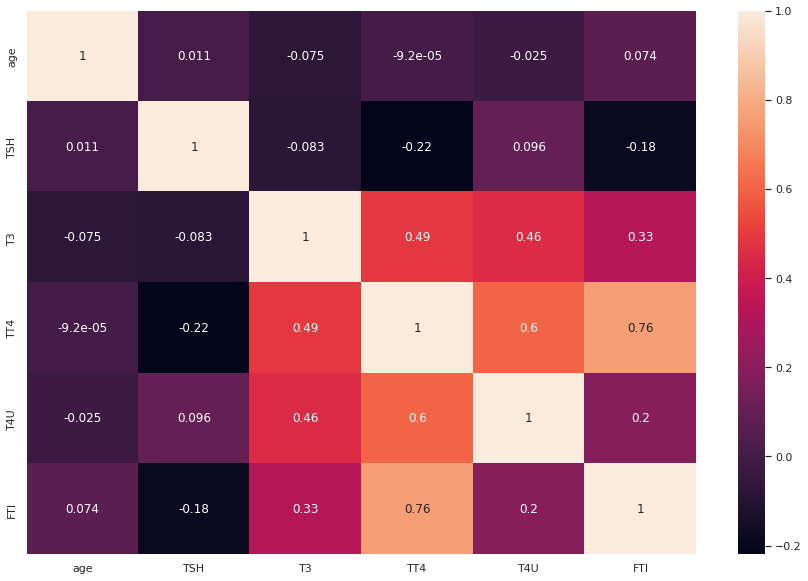

In [329]:
# Plotting a heatmap to show correlation

plt.figure(figsize=(15,10))
sb.heatmap(corr, annot = True)
plt.show()

## Modelling

In [398]:

#Finding the best principal Components
from sklearn.decomposition import PCA

np.random.seed(0)

X = final_df.drop('status', axis=1)

X = pd.get_dummies(X)

train_features = X

model = PCA(n_components=10).fit(train_features)

# number of components
n_pcs= model.components_.shape[0]
# get the index of the most important feature on EACH component
# LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]
initial_feature_names = [ 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query3hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured']
# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]
# LIST COMPREHENSION HERE AGAIN
dic = {'PC{}'.format(i): most_important_names[i] for i in range(n_pcs)}
# build the dataframe
df = pd.DataFrame(dic.items())
df

,0,1
0,PC0,thyroid_surgery
1,PC1,query_on_thyroxine
2,PC2,sex
3,PC3,age
4,PC4,on_thyroxine
5,PC5,query3hypothyroid
6,PC6,query3hypothyroid
7,PC7,pregnant
8,PC8,T3
9,PC9,TT4


In [399]:
from sklearn.linear_model import LogisticRegression

X = final_df.drop('status', axis=1)

X = pd.get_dummies(X)
y_val = final_df['status']
y = pd.get_dummies(y_val)
y = final_df.status.cat.codes


In [400]:
# Split the independent and dependent variables

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)

y_pred = LogReg.predict(X_test)
print('accuracy_score:',accuracy_score (y_test , y_pred))


accuracy_score: 0.9881209503239741


* We have an accuracy score of 98% on the baseline model which is pretty awesome!

### 1)Decision Trees

**Random Forests**

In [405]:
# Selecting the independent variables and the target variable
#
X = final_df.drop('status', axis = 1)
y = final_df['status']

# Encoding categorical variables
#
X = pd.get_dummies(X)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print('accuracy_score:',accuracy_score (y_test , y_pred))


accuracy_score: 0.9946004319654428


* On using a decision forest our accuracy score has increased t0 99%. 

In [406]:
# Previewing the hyperparameters to tune
#
RandomForestClassifier()

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [410]:
# Creating a dictionary of parameters to tune
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
params = {'n_estimators': [10, 20, 30, 50, 100],
         'max_depth': [1, 2, 3, 4, 5]}

# Setting the number of folds to 10 and instantiating the model
# 
kfold = KFold(n_splits=10, shuffle=True)
model = RandomForestClassifier()

search = GridSearchCV(model, param_grid=params, scoring = 'f1', cv = kfold)

# Fitting the grid search with the X and the y variables
#
search.fit(X, y)

# Checking for the best parameters
#
print(f'The best parameters are: {search.best_params_}')

The best parameters are: {'max_depth': 5, 'n_estimators': 50}


In [411]:
# Applying the best parameters to the model
#
# Selecting only important features and the y variable
#
X = X[['age', 'TSH_measured_y', 'T4U_measured_y','FTI_measured_y','T3_measured_n',
       'FTI_measured_n','TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TSH_measured_n']]
y = np.where(final_df.status == 'hypothyroid', 1, 0)

# Splitting the data into training and testing sets
#
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Instantiating the model
#
rf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state = 0)
rf.fit(X_train, y_train)

# Making predictions
#
y_pred = rf.predict(X_test)

# Measuring the accuracy of the model
#
print(f'The accuracy score is:', accuracy_score(y_test, y_pred))
print('\n')
#confusion_matrix(y_test, y_pred)

The accuracy score is: 0.9913606911447084




In [412]:
# And now assessing the errors
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.008639308855291577
Mean Squared Error: 0.008639308855291577
Root Mean Squared Error: 0.09294788246803462


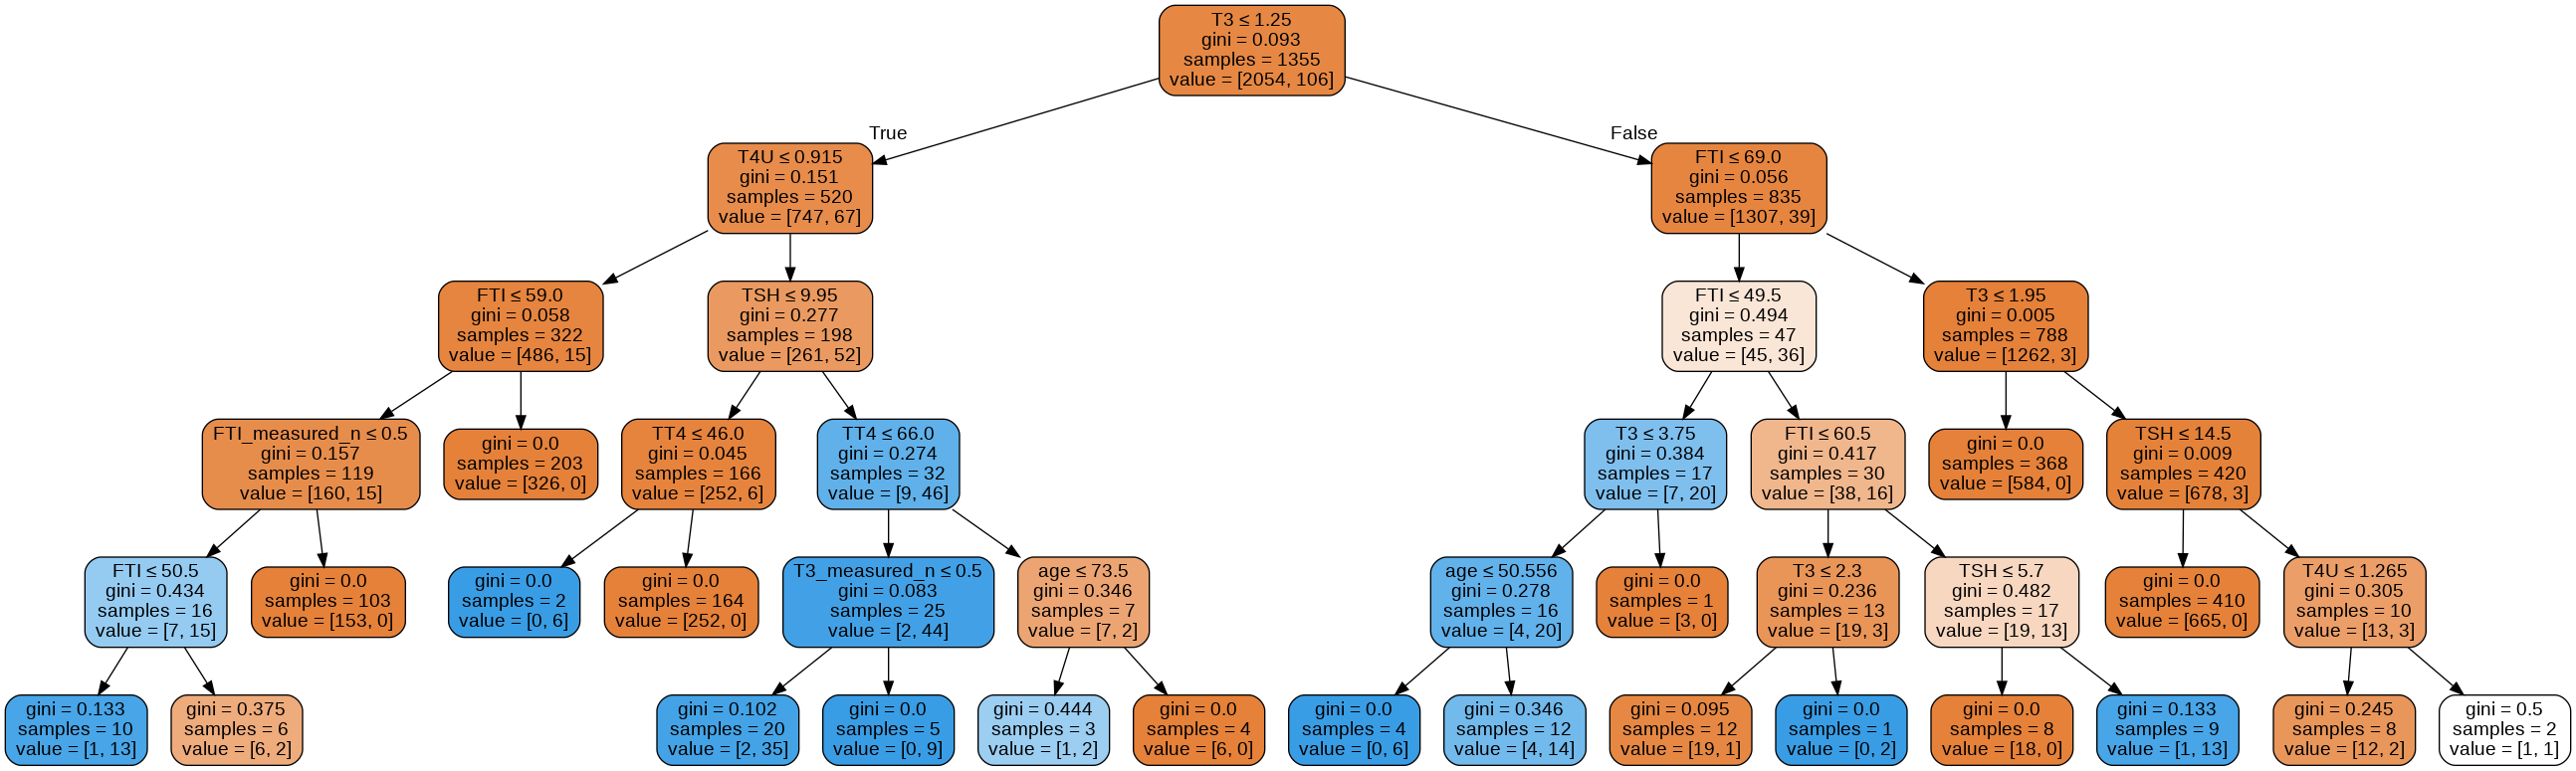

In [417]:
# picking the 10th tree from the forest
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
tree = rf.estimators_[10]

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X.columns)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

**Gradient Boosted Trees**

In [425]:
#from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
target_number_of_trees = 30

gbc = GradientBoostingClassifier(n_estimators=target_number_of_trees, learning_rate=0.001, max_depth=20)
gbc = gbc.fit(X_train, y_train)

y_pred_gbc = gbc.predict(X_test)
accuracy_score(y_test, y_pred_gbc)
print('accuracy_score:',accuracy_score (y_test , y_pred_gbc))


accuracy_score: 0.9578833693304536


* The accuracy score when dealing with Ada Boosted trees has decreased to 95% from the initial 99% when using random forests. 
* It is therefore advisable to use random forests in this case. 

### 2) Support Vector Machines

In [431]:

# Select the variables 
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

X = final_df[['FTI', 'TSH']].values
y = np.where(final_df.status == 'hypothyroid', 1, 0)


poly = SVC(kernel='poly')
linear = SVC(kernel = 'linear')
rbf = SVC(kernel ='rbf')

# Creating a list of the models and model names
#
models = [poly, linear, rbf]
model_names = ['Polynomial', 'Linear', 'Rbf']
# Creating a function that trains a model and returns its accuracy together with the model
#
def predictor(model, X, y):
  # Splitting the data into training and testing sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
  
  # Standardising the data
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)
  
  # Training the model and making predictions
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  
  # Measuring the accuracy of the model
  f1 = f1_score(y_test, y_pred)
  acc = accuracy_score(y_test, y_pred)
  
  # Returning the accuracy and the model
  return acc, f1, model

# Getting the accuracies of the models  using a for loop
#
for model, name in zip(models, model_names):
  print(f'The accuracy score of {name:<10} is: {predictor(model, X, y)[0]} and the f1 score is: {predictor(model, X, y)[1]}')

The accuracy score of Polynomial is: 0.9827213822894169 and the f1 score is: 0.7500000000000001
The accuracy score of Linear     is: 0.9794816414686826 and the f1 score is: 0.7164179104477612
The accuracy score of Rbf        is: 0.9848812095032398 and the f1 score is: 0.7941176470588235


* Rbf kernel gives the highest accuracy score and is therefore the best approach to take. 